In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Choose PC OR MAC File Directory

In [2]:
# directory = "/Users/richardeli/Downloads/USYD/Thesis/Data Generated/Simulation/"
directory = "C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\Simulation\\"

file_names = [
    os.path.splitext(f)[0] for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))
]

# TABLE 12 - Count of true values

In [3]:
true_counts = []

# Iterate through files named 1.csv to 17.csv
for i in range(1, 18):
    file_path = os.path.join(directory, f"{i}.csv")
    
    try:
        # Read the CSV file
        df = pd.read_csv(file_path)

        # Count the True values in the 'Catastrophe Point Found?' column
        true_count = df["Catastrophe Point Found?"].sum()

        if i == 12:
            true_count = 508
            
        true_counts.append(true_count)
        
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        true_counts.append(0)  # Add 0 if file is missing

model_numbers = list(range(1, 18))  # Model numbers from 1 to 16
summary_df = pd.DataFrame({
    'Model Number': model_numbers,
    'Count of True Values': true_counts
})

# Display the DataFrame as a table
print(summary_df)

    Model Number  Count of True Values
0              1                   973
1              2                   982
2              3                   971
3              4                   916
4              5                   905
5              6                   790
6              7                   710
7              8                   808
8              9                   719
9             10                   688
10            11                   686
11            12                   508
12            13                   807
13            14                   898
14            15                   943
15            16                   937
16            17                   944


# FIGURE 33 - Mean speculator proportion at cusp for each model

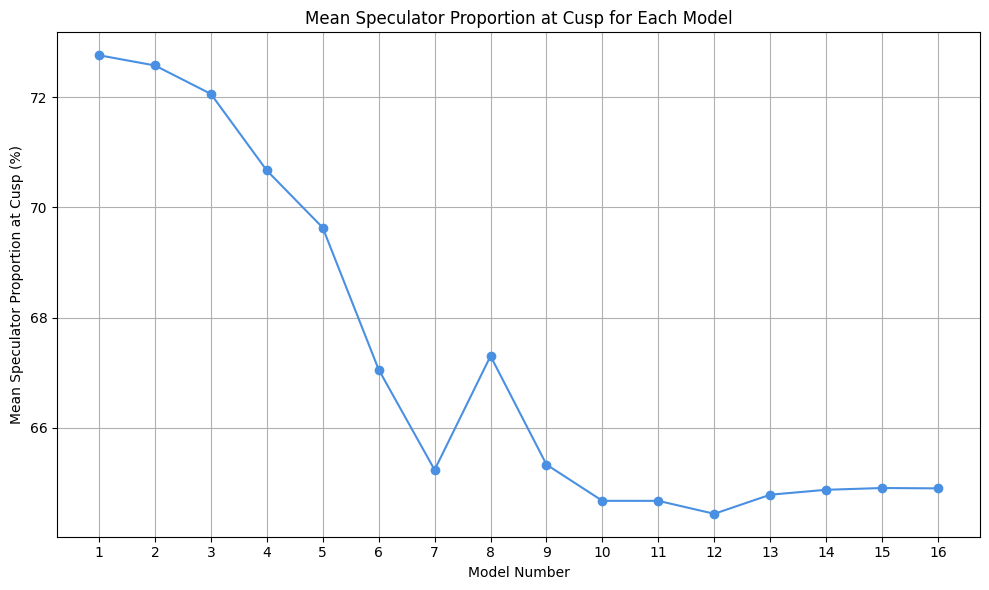

In [4]:
mean_speculator_proportions = []

for i in range(1, 17):
    file_path = os.path.join(directory, f"{i}.csv")
    
    try:
        df = pd.read_csv(file_path)

        if "Speculator Proportion at CUSP" in df.columns:
            df["Speculator Proportion at CUSP"] = df["Speculator Proportion at CUSP"].str.replace('%', '', regex=False)
            df["Speculator Proportion at CUSP"] = df["Speculator Proportion at CUSP"].astype(float)

            mean_value = df["Speculator Proportion at CUSP"].mean()
            mean_speculator_proportions.append(mean_value)
        else:
            mean_speculator_proportions.append(None)
            
    except FileNotFoundError:
        mean_speculator_proportions.append(None)
    except Exception as e:
        mean_speculator_proportions.append(None)

model_numbers = list(range(1, 17))

valid_indices = [i for i, value in enumerate(mean_speculator_proportions) if value is not None]
valid_model_numbers = [model_numbers[i] for i in valid_indices]
valid_means = [mean_speculator_proportions[i] for i in valid_indices]

plt.figure(figsize=(10, 6))
plt.plot(valid_model_numbers, valid_means, marker='o', linestyle='-', color='#4A90E2')
plt.title('Mean Speculator Proportion at Cusp for Each Model')
plt.xlabel('Model Number')
plt.ylabel('Mean Speculator Proportion at Cusp (%)')
plt.xticks(valid_model_numbers)
plt.grid()
plt.tight_layout()

plt.show()


# TABLE 13 - Model Stats

In [5]:
# Create a list to store statistics dictionaries
stats_list = []

# Iterate through files named 1.csv to 16.csv
for i in range(1, 18):
    file_path = os.path.join(directory, f"{i}.csv")
    
    try:
        # Read the CSV file
        df = pd.read_csv(file_path)

        # Check if the column exists
        if "Speculator Proportion at CUSP" in df.columns:
            # Remove the percentage sign and convert to float
            df["Speculator Proportion at CUSP"] = df["Speculator Proportion at CUSP"].str.replace('%', '', regex=False).astype(float)

            # Calculate statistics
            mean_value = df["Speculator Proportion at CUSP"].mean()
            stddev_value = df["Speculator Proportion at CUSP"].std()
            min_value = df["Speculator Proportion at CUSP"].min()
            max_value = df["Speculator Proportion at CUSP"].max()

            # Append the statistics to the list
            stats_list.append({
                "Model Number": i,
                "Mean": mean_value,
                "Standard Deviation": stddev_value,
                "Min": min_value,
                "Max": max_value
            })
        else:
            print(f"Column not found in {file_path}")
            
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred while processing {file_path}: {e}")

# Create a DataFrame from the list of statistics
stats_summary = pd.DataFrame(stats_list)
stats_summary

,Model Number,Mean,Standard Deviation,Min,Max
0,1,72.760000,3.360609,60.0,80.00
1,2,72.575000,2.555564,62.6,77.60
2,3,72.058918,2.612334,62.6,78.60
3,4,70.670000,2.943767,62.6,77.60
4,5,69.632000,2.134744,64.0,74.00
5,6,67.058000,1.676737,64.0,70.00
6,7,65.238400,0.830720,64.0,66.80
7,8,67.303400,1.706722,64.0,70.20
8,9,65.334320,0.862993,64.0,66.88
9,10,64.676480,0.469464,64.0,65.44
